# Data Product Arquitecture - Food Inspections Project

Team:

* Jóse Roberto Pérez - 173013
* Santiago Battezzati - 197727
* Carlos Geovany Pérez - 197614
* Mariana Lugo - 118626

## Imports

#### Standard library imports

In [1]:
import os
import sys
from datetime import datetime

#### Third party imports

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
pd.options.display.max_columns = 25

import seaborn as sns

#### Local application imports

In [3]:
sys.path.append("../")

In [4]:
%reload_ext autoreload
%autoreload 2

from src.utils.utils import *

---

## Importing and cleaning data
Food Inspections in Chicago: https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5

In [5]:
df= pd.read_csv('../data/Food_Inspections.csv')
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2453552,CLAMP DOWN BURGERS,NaN,2749943.0,NaN,Risk 2 (Medium),1742 W DIVISION ST,CHICAGO,IL,60622.0,10/20/2020,License,No Entry,NaN,41.903387,-87.671740,"(-87.67174026586648, 41.903386755553484)"
1,2386633,JIN JU,JIN JU,27137.0,Restaurant,Risk 1 (High),5203 N CLARK ST,CHICAGO,IL,60640.0,08/28/2020,Canvass,No Entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"
2,2386595,LA BIZNAGA #2,LA BIZNAGA #2,2708992.0,NaN,Risk 1 (High),2949 W BELMONT AVE,CHICAGO,IL,60618.0,08/27/2020,Complaint,No Entry,NaN,41.939256,-87.702270,"(-87.70226967930802, 41.939255926667535)"
3,2386464,Uni Sushi Bristo,Uni Sushi Bistro,2262637.0,Restaurant,Risk 1 (High),1752 W NORTH AVE,CHICAGO,IL,60622.0,08/25/2020,Complaint,No Entry,NaN,41.910676,-87.672205,"(-87.67220465807979, 41.91067561170382)"
4,2386398,KIKI'S BISTRO,KIKI'S BISTRO,22899.0,Restaurant,Risk 1 (High),900 N FRANKLIN ST,CHICAGO,IL,60610.0,08/24/2020,Canvass,No Entry,NaN,41.898998,-87.635921,"(-87.63592067312285, 41.89899799424835)"


In [6]:
profile = ProfileReport(df, title="Pandas Profiling Report")

Limpieza de nombres de las columnas:

In [8]:
clean_col_names(df)

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,2453552,CLAMP DOWN BURGERS,NaN,2749943.0,NaN,Risk 2 (Medium),1742 W DIVISION ST,CHICAGO,IL,60622.0,10/20/2020,License,No Entry,NaN,41.903387,-87.671740,"(-87.67174026586648, 41.903386755553484)"
1,2386633,JIN JU,JIN JU,27137.0,Restaurant,Risk 1 (High),5203 N CLARK ST,CHICAGO,IL,60640.0,08/28/2020,Canvass,No Entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"
2,2386595,LA BIZNAGA #2,LA BIZNAGA #2,2708992.0,NaN,Risk 1 (High),2949 W BELMONT AVE,CHICAGO,IL,60618.0,08/27/2020,Complaint,No Entry,NaN,41.939256,-87.702270,"(-87.70226967930802, 41.939255926667535)"
3,2386464,Uni Sushi Bristo,Uni Sushi Bistro,2262637.0,Restaurant,Risk 1 (High),1752 W NORTH AVE,CHICAGO,IL,60622.0,08/25/2020,Complaint,No Entry,NaN,41.910676,-87.672205,"(-87.67220465807979, 41.91067561170382)"
4,2386398,KIKI'S BISTRO,KIKI'S BISTRO,22899.0,Restaurant,Risk 1 (High),900 N FRANKLIN ST,CHICAGO,IL,60610.0,08/24/2020,Canvass,No Entry,NaN,41.898998,-87.635921,"(-87.63592067312285, 41.89899799424835)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215062,229233,"ZULLO'S MARKETS, LLC",ZULLO'S MARKET,2016915.0,Restaurant,Risk 2 (Medium),131 N Clinton ST,CHICAGO,IL,60661.0,02/18/2010,License,Fail,NaN,41.884188,-87.641120,"(-87.64111966683218, 41.884187507127805)"
215063,68205,LA FONDA CHIQUITA TLC,LA FONDA CHIQUITA,2017215.0,Restaurant,Risk 1 (High),5940 W DIVERSEY AVE,CHICAGO,IL,60639.0,02/09/2010,License,Fail,12. HAND WASHING FACILITIES: WITH SOAP AND SAN...,41.931260,-87.775203,"(-87.77520287598688, 41.93125971874477)"
215064,88234,KABAB CUISINE 2,KABAB CUISINE 2,2014076.0,Restaurant,Risk 1 (High),6320 N LINCOLN AVE,CHICAGO,IL,60659.0,02/01/2010,License Re-Inspection,Pass,NaN,41.996139,-87.716968,"(-87.71696834498202, 41.996139331170895)"
215065,74311,MARGARITA DISTRIBUTORS,NaN,2017298.0,Wholesale,Risk 3 (Low),2332 S BLUE ISLAND AVE BLDG,CHICAGO,IL,60608.0,02/19/2010,License Re-Inspection,Pass,NaN,41.849940,-87.672421,"(-87.67242100722251, 41.84994008002549)"


**Número de variables:**

In [10]:
count_vars(df)

Número de variables en los datos --> 17


**Número de observaciones:**

In [11]:
count_obs(df)

Número de observaciones en los datos --> 215067


**¿Qué variables son?**

In [12]:
count_unique_obs(df)

inspection_id      215067
dba_name            28748
aka_name            27355
license_#           39103
facility_type         500
risk                    4
address             18522
city                   70
state                   4
zip                   112
inspection_date      2796
inspection_type       110
results                 7
violations         156694
latitude            17246
longitude           17246
location            17246
dtype: int64

In [13]:
cat_vars=['dba_name','aka_name','facility_type','risk','address','city','state','inspection_type',
          'results','violations']
data_profiling_categ(df, cat_vars)

*********************************
Variable Categorica dba_name
*********************************


Info,dba_name
Num_Registros,215067
Num_de_categorias,28748
Moda,SUBWAY
Valores_faltantes,0
Top1,"[SUBWAY, 2905]"
Top2,"[DUNKIN DONUTS, 1578]"
Top3,"[MCDONALD'S, 614]"


None
Valores de las categorias y sus proporciones


,Observaciones,proporción
Categoría,,
SUBWAY,2905,1.4%
DUNKIN DONUTS,1578,0.7%
MCDONALD'S,614,0.3%
7-ELEVEN,469,0.2%
MCDONALDS,344,0.2%
...,...,...
PUMP GRILL,1,0.0%
WHITE STOKES CO INC,1,0.0%
JUBILEE MARKET INC,1,0.0%


None



*********************************
Variable Categorica aka_name
*********************************


Info,aka_name
Num_Registros,215067
Num_de_categorias,27355
Moda,SUBWAY
Valores_faltantes,2486
Top1,"[SUBWAY, 3565]"
Top2,"[DUNKIN DONUTS, 1586]"
Top3,"[7-ELEVEN, 882]"


None
Valores de las categorias y sus proporciones


,Observaciones,proporción
Categoría,,
SUBWAY,3565,1.7%
DUNKIN DONUTS,1586,0.7%
7-ELEVEN,882,0.4%
MCDONALD'S,834,0.4%
BURGER KING,448,0.2%
...,...,...
ATOMIX,1,0.0%
CHICAGO HOMAN FOOD MART INC,1,0.0%
HOLLYWOOD VIDEO #013-994,1,0.0%


None



*********************************
Variable Categorica facility_type
*********************************


Info,facility_type
Num_Registros,215067
Num_de_categorias,500
Moda,Restaurant
Valores_faltantes,4889
Top1,"[Restaurant, 143207]"
Top2,"[Grocery Store, 28084]"
Top3,"[School, 13206]"


None
Valores de las categorias y sus proporciones


,Observaciones,proporción
Categoría,,
Restaurant,143207,66.6%
Grocery Store,28084,13.1%
School,13206,6.1%
Children's Services Facility,3707,1.7%
Bakery,3153,1.5%
...,...,...
CHICAGO PARK DISTRICT,1,0.0%
(convenience store),1,0.0%
HOOKA BAR,1,0.0%


None



*********************************
Variable Categorica risk
*********************************


Info,risk
Num_Registros,215067
Num_de_categorias,4
Moda,Risk 1 (High)
Valores_faltantes,69
Top1,"[Risk 1 (High), 153815]"
Top2,"[Risk 2 (Medium), 41971]"
Top3,"[Risk 3 (Low), 19184]"


None
Valores de las categorias y sus proporciones


,Observaciones,proporción
Categoría,,
Risk 1 (High),153815,71.5%
Risk 2 (Medium),41971,19.5%
Risk 3 (Low),19184,8.9%
All,28,0.0%


None



*********************************
Variable Categorica address
*********************************


Info,address
Num_Registros,215067
Num_de_categorias,18522
Moda,11601 W TOUHY AVE
Valores_faltantes,0
Top1,"[11601 W TOUHY AVE , 2674]"
Top2,"[5700 S CICERO AVE , 593]"
Top3,"[500 W MADISON ST , 465]"


None
Valores de las categorias y sus proporciones


,Observaciones,proporción
Categoría,,
11601 W TOUHY AVE,2674,1.2%
5700 S CICERO AVE,593,0.3%
500 W MADISON ST,465,0.2%
2300 S THROOP ST,410,0.2%
324 N LEAVITT ST,391,0.2%
...,...,...
2952-2958 W NORTH AVE,1,0.0%
2349 N MAJOR AVE,1,0.0%
8239-8241 S KEDZIE AVE,1,0.0%


None



*********************************
Variable Categorica city
*********************************


Info,city
Num_Registros,215067
Num_de_categorias,70
Moda,CHICAGO
Valores_faltantes,158
Top1,"[CHICAGO, 214166]"
Top2,"[Chicago, 345]"
Top3,"[chicago, 111]"


None
Valores de las categorias y sus proporciones


,Observaciones,proporción
Categoría,,
CHICAGO,214166,99.6%
Chicago,345,0.2%
chicago,111,0.1%
CCHICAGO,48,0.0%
SCHAUMBURG,27,0.0%
...,...,...
BOLINGBROOK,1,0.0%
WHEATON,1,0.0%
EVERGREEN PARK,1,0.0%


None



*********************************
Variable Categorica state
*********************************


Info,state
Num_Registros,215067
Num_de_categorias,4
Moda,IL
Valores_faltantes,50
Top1,"[IL, 215014]"
Top2,"[NY, 1]"
Top3,"[WI, 1]"


None
Valores de las categorias y sus proporciones


,Observaciones,proporción
Categoría,,
IL,215014,100.0%
NY,1,0.0%
WI,1,0.0%
IN,1,0.0%


None



*********************************
Variable Categorica inspection_type
*********************************


Info,inspection_type
Num_Registros,215067
Num_de_categorias,110
Moda,Canvass
Valores_faltantes,1
Top1,"[Canvass, 114224]"
Top2,"[License, 28292]"
Top3,"[Canvass Re-Inspection, 22824]"


None
Valores de las categorias y sus proporciones


,Observaciones,proporción
Categoría,,
Canvass,114224,53.1%
License,28292,13.2%
Canvass Re-Inspection,22824,10.6%
Complaint,19908,9.3%
License Re-Inspection,9631,4.5%
...,...,...
Business Not Located,1,0.0%
Task Force Liquor Catering,1,0.0%
FIRE,1,0.0%


None



*********************************
Variable Categorica results
*********************************


Info,results
Num_Registros,215067
Num_de_categorias,7
Moda,Pass
Valores_faltantes,0
Top1,"[Pass, 112619]"
Top2,"[Fail, 41511]"
Top3,"[Pass w/ Conditions, 32540]"


None
Valores de las categorias y sus proporciones


,Observaciones,proporción
Categoría,,
Pass,112619,52.4%
Fail,41511,19.3%
Pass w/ Conditions,32540,15.1%
Out of Business,18706,8.7%
No Entry,7332,3.4%
Not Ready,2287,1.1%
Business Not Located,72,0.0%


None



*********************************
Variable Categorica violations
*********************************


Info,violations
Num_Registros,215067
Num_de_categorias,156694
Moda,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...
Valores_faltantes,57424
Top1,[32. FOOD AND NON-FOOD CONTACT SURFACES PROPER...
Top2,"[30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABE..."
Top3,[45. FOOD HANDLER REQUIREMENTS MET - Comments:...


None
Valores de las categorias y sus proporciones


,Observaciones,proporción
Categoría,,
"32. FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DESIGNED, CONSTRUCTED AND MAINTAINED - Comments: VIOLATION STILL PENDING",11,0.0%
"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABELED: CUSTOMER ADVISORY POSTED AS NEEDED - Comments: OBSERVED NO DBA NAME ON THE LATERAL SIDE OF THE CART, INSTRUCTED TO PROVIDE BUSINESS NAME LEGIBLY PAINTED IN LETTERS AT LEAST TWO INCHES IN HEIGHT IN A CONSPICUOUS PLACE ON EACH LATERAL SIDE OF CART.",10,0.0%
45. FOOD HANDLER REQUIREMENTS MET - Comments: ALL FOOD HANDLING EMPLOYEES MUST SHOW PROOF OF FOOD HANDLER TRAINING. MUST PROVIDE.,10,0.0%
2. FACILITIES TO MAINTAIN PROPER TEMPERATURE - Comments: NO MECHANICAL REFRIGERATION. MOBILE DESSERTS VENDOR WILL USE DRY ICE TO MAINTAIN PACKAGED FROZEN DESSERTS.,7,0.0%
45. FOOD HANDLER REQUIREMENTS MET - Comments: ALL FOOD HANDLING EMPLOYEES MUST SHOW PROOF OF FOOD HANDLER TRAINING. MUST PROVIDE.,7,0.0%
...,...,...
36. THERMOMETERS PROVIDED & ACCURATE - Comments: OBSERVED NO AMBIENT AIR THERMOMETERS INSIDE REACH IN COOLER AND WARMING RACK INSIDE LUNCHROOM SERVICE LINE. EXTERNAL TEMPERATURE GAUGE OF UNITS ARE LOCATED IN KITCHEN PREP AREA. INSTRUCTED TO PROVIDE CONSPICUOUS AND EASILY READABLE THERMOMETERS INSIDE ALL REFRIGERATOR AND WARMING UNITS TO PROPERLY MONITOR THE AMBIENT AIR TEMPERATURE OF EQUIPMENT. | 54. GARBAGE & REFUSE PROPERLY DISPOSED; FACILITIES MAINTAINED - Comments: OBSERVED PREP HANDSINKS WITHOUT A WASTE RECEPTACLE. INFORMED THAT ANY AND ALL HANDWASHING SINK WHICH ARE PROVIDED WITH DISPOSABLE TOWELS SHALL ALSO BE PROVIDED WITH A WASTE RECEPTACLE. INSTRUCTED TO PROVIDE.,1,0.0%
"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR, SURFACES CLEAN AND DUST-LESS CLEANING METHODS - Comments: NOTED THE FOLLOWING:- -MULTIPLE HOLES AND OPENING ON WALLS -CEILING AND ALONG PIPING THROUGHOUT PREMISE. -STAINED CEILING TILES AND DUSTY CEILINGS AT THE FRONT DINING AREA. -WATER LEAKING FROM THE CEILING AND COLLECTING INTO A CONTAINER AT THE REAR FOOD PREP/DISH WASHING AREA. INSTRUCTED TO DETAIL CLEAN, REPAIR ALL HOLES AND OPENINGS, LEAKING CEILING AND MAINTAIN. | 38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS REQUIRED: PLUMBING: INSTALLED AND MAINTAINED - Comments: NOTED THE FOLLOWING:- - NOTED NO SPLASH GUARD AT THE REAR HAND WASH SINK BY THE PREP TABLE AT THE ROOM WITH CHEST FREEZERS. INSTRUCTED TO INSTALL A SPLASH GUARD.",1,0.0%
"33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS - Comments: MUST DIRT REMOVE BULK FOOD CONTAINER IN REAR OF PREP AREA AND CLEAN BOTTOM COMPARTMENT OF DEEP FRYERS OF GREASE BUILD-UP,INSTRUCTED TO CLEAN AND NAINTAIN EQUIPMENT | 34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED - Comments: DETAIL CLEAN FLOORS THROUGHOUT REAR PREP AREA,ALONG WALL BASE AND CORNERS | 35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR, SURFACES CLEAN AND DUST-LESS CLEANING METHODS - Comments: MUST CLEAN THE LIGHT SHIELD COVERS IN THE PREP AREA OF DUST BUILD-UP | 41. PREMISES MAINTAINED FREE OF LITTER, UNNECESSARY ARTICLES, CLEANING EQUIPMENT PROPERLY STORED - Comments: MUST REMOVE CLITTER FROM UNDERNEATH PREP TABLE IN REAR PREP AREA,TO PREVENT RODENT HARBORAGE | 43. FOOD (ICE) DISPENSING UTENSILS, WASH CLOTHS PROPERLY STORED - Comments: MUST STORE WIPING CLOTHS IN A SANITIZING SOLUTION WHEN NOT IN USE",1,0.0%


None





### Análisis de texto
Issue #13 GitHub

In [14]:
df

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,2453552,CLAMP DOWN BURGERS,NaN,2749943.0,NaN,Risk 2 (Medium),1742 W DIVISION ST,CHICAGO,IL,60622.0,10/20/2020,License,No Entry,NaN,41.903387,-87.671740,"(-87.67174026586648, 41.903386755553484)"
1,2386633,JIN JU,JIN JU,27137.0,Restaurant,Risk 1 (High),5203 N CLARK ST,CHICAGO,IL,60640.0,08/28/2020,Canvass,No Entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"
2,2386595,LA BIZNAGA #2,LA BIZNAGA #2,2708992.0,NaN,Risk 1 (High),2949 W BELMONT AVE,CHICAGO,IL,60618.0,08/27/2020,Complaint,No Entry,NaN,41.939256,-87.702270,"(-87.70226967930802, 41.939255926667535)"
3,2386464,Uni Sushi Bristo,Uni Sushi Bistro,2262637.0,Restaurant,Risk 1 (High),1752 W NORTH AVE,CHICAGO,IL,60622.0,08/25/2020,Complaint,No Entry,NaN,41.910676,-87.672205,"(-87.67220465807979, 41.91067561170382)"
4,2386398,KIKI'S BISTRO,KIKI'S BISTRO,22899.0,Restaurant,Risk 1 (High),900 N FRANKLIN ST,CHICAGO,IL,60610.0,08/24/2020,Canvass,No Entry,NaN,41.898998,-87.635921,"(-87.63592067312285, 41.89899799424835)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215062,229233,"ZULLO'S MARKETS, LLC",ZULLO'S MARKET,2016915.0,Restaurant,Risk 2 (Medium),131 N Clinton ST,CHICAGO,IL,60661.0,02/18/2010,License,Fail,NaN,41.884188,-87.641120,"(-87.64111966683218, 41.884187507127805)"
215063,68205,LA FONDA CHIQUITA TLC,LA FONDA CHIQUITA,2017215.0,Restaurant,Risk 1 (High),5940 W DIVERSEY AVE,CHICAGO,IL,60639.0,02/09/2010,License,Fail,12. HAND WASHING FACILITIES: WITH SOAP AND SAN...,41.931260,-87.775203,"(-87.77520287598688, 41.93125971874477)"
215064,88234,KABAB CUISINE 2,KABAB CUISINE 2,2014076.0,Restaurant,Risk 1 (High),6320 N LINCOLN AVE,CHICAGO,IL,60659.0,02/01/2010,License Re-Inspection,Pass,NaN,41.996139,-87.716968,"(-87.71696834498202, 41.996139331170895)"
215065,74311,MARGARITA DISTRIBUTORS,NaN,2017298.0,Wholesale,Risk 3 (Low),2332 S BLUE ISLAND AVE BLDG,CHICAGO,IL,60608.0,02/19/2010,License Re-Inspection,Pass,NaN,41.849940,-87.672421,"(-87.67242100722251, 41.84994008002549)"


#### 1. Limpieza de campo `facility_type`

In [19]:
txt = "bakery, banquet hall, candy store, caterer, coffee shop, day care center (for ages less than 2), day care center (for ages 2 – 6), day care center (combo, for ages less than 2 and 2 – 6 combined), gas station, Golden Diner, grocery store, hospital, long term care center(nursing home), liquor store, mobile food dispenser, restaurant, paleteria, school, shelter, tavern, social club, wholesaler, Wrigley Field Rooftop"

In [17]:
txt

'bakery, banquet hall, candy store, caterer, coffee shop, day care center (for ages less than 2), day care center (for ages 2 – 6), day care center (combo, for ages less than 2 and 2 – 6 combined), gas station, Golden Diner, grocery store, hospital, long term care center(nursing home), liquor store, mobile food dispenser, restaurant, paleteria, school, shelter, tavern, social club, wholesaler, Wrigley Field Rooftop.'

In [20]:
txt.split(sep=", ")

['bakery',
 'banquet hall',
 'candy store',
 'caterer',
 'coffee shop',
 'day care center (for ages less than 2)',
 'day care center (for ages 2 – 6)',
 'day care center (combo',
 'for ages less than 2 and 2 – 6 combined)',
 'gas station',
 'Golden Diner',
 'grocery store',
 'hospital',
 'long term care center(nursing home)',
 'liquor store',
 'mobile food dispenser',
 'restaurant',
 'paleteria',
 'school',
 'shelter',
 'tavern',
 'social club',
 'wholesaler',
 'Wrigley Field Rooftop']

#### 2. Limpieza de campo `inspection_date`

#### 3. Limpieza de campo `violations`

---

## 1. ¿Cuáles son los tipos 10 de establecimientos que más violaciones cometen? (Facility Type)


In [21]:
conteos_ft=df.groupby(["results","facility_type"]).size().reset_index(name="counts")
conteos_ft=conteos_ft.pivot("facility_type","results","counts")
conteos_ft=conteos_ft.fillna(0)
conteos_ft['Total']=conteos_ft.sum(1)
conteos_ft =conteos_ft.sort_values('Fail',ascending=False)
conteos_ft

results,Business Not Located,Fail,No Entry,Not Ready,Out of Business,Pass,Pass w/ Conditions,Total
facility_type,,,,,,,,
Restaurant,25.0,26606.0,6048.0,1484.0,10039.0,74775.0,24230.0,143207.0
Grocery Store,7.0,6576.0,464.0,338.0,2696.0,14048.0,3955.0,28084.0
School,4.0,2645.0,54.0,3.0,342.0,8988.0,1170.0,13206.0
Bakery,1.0,685.0,101.0,40.0,261.0,1642.0,423.0,3153.0
Children's Services Facility,0.0,651.0,86.0,34.0,111.0,2242.0,583.0,3707.0
...,...,...,...,...,...,...,...,...
LIQUOR/COFFEE KIOSK,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0
LONG TERM CARE FACILITY,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Long-Term Care,0.0,0.0,0.0,0.0,1.0,3.0,0.0,4.0


In [82]:
n = 10
top10=df['facility_type'].value_counts()[:10].sort_values(ascending=False)
top10

Restaurant                         143207
Grocery Store                       28084
School                              13206
Children's Services Facility         3707
Bakery                               3153
Daycare (2 - 6 Years)                2836
Daycare Above and Under 2 Years      2665
Long Term Care                       1430
Catering                             1314
Liquor                                937
Name: facility_type, dtype: int64

Se muestra el porcentaje del tipo de establecimiento acuerdo con el resultado de la inspección:

In [64]:
proporciones_ft=round(conteos_ft.iloc[:,0:7].apply(lambda x: x/x.sum()*100, axis=1),2)
proporciones_ft=proporciones_ft.sort_values('Fail',ascending=False)
proporciones_ft

results,Business Not Located,Fail,No Entry,Not Ready,Out of Business,Pass,Pass w/ Conditions
facility_type,,,,,,,
CHURCH/AFTER SCHOOL PROGRAM,0.0,100.0,0.0,0.00,0.0,0.00,0.0
religious,0.0,100.0,0.0,0.00,0.0,0.00,0.0
ART GALLERY,0.0,100.0,0.0,0.00,0.0,0.00,0.0
PRODUCE VENDOR,0.0,100.0,0.0,0.00,0.0,0.00,0.0
PROTEIN SHAKE BAR,0.0,100.0,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...
DRUG STORE,0.0,0.0,0.0,40.00,0.0,20.00,40.0
DRUG STORE/W/ FOOD,0.0,0.0,0.0,0.00,0.0,100.00,0.0
Day Care Combo (1586),0.0,0.0,0.0,0.00,100.0,0.00,0.0


## 2. ¿Qué tipo de inspección detecta más establecimientos fuera de regla? (Inspection Type)

In [72]:
conteos_it=df.groupby(["results","inspection_type"]).size().reset_index(name="counts")
conteos_it=conteos_it.pivot("inspection_type","results","counts")
conteos_it=conteos_it.fillna(0)
conteos_it['Total']=conteos_it.sum(1)
conteos_it =conteos_it.sort_values('Fail',ascending=False)
conteos_it

results,Business Not Located,Fail,No Entry,Not Ready,Out of Business,Pass,Pass w/ Conditions,Total
inspection_type,,,,,,,,
Canvass,37.0,19660.0,5248.0,56.0,18412.0,51869.0,18942.0,114224.0
License,10.0,9617.0,542.0,2136.0,58.0,13727.0,2202.0,28292.0
Complaint,19.0,6475.0,834.0,17.0,67.0,8199.0,4297.0,19908.0
Canvass Re-Inspection,0.0,1633.0,270.0,2.0,76.0,17662.0,3181.0,22824.0
License Re-Inspection,0.0,1119.0,42.0,43.0,7.0,7565.0,855.0,9631.0
...,...,...,...,...,...,...,...,...
Summer Feeding,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
FIRE,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
License consultation,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Se muestra el porcentaje del tipo de inspección de acuerdo con los resultados:

In [84]:
proporciones_it=round(conteos_it.iloc[:,0:7].apply(lambda x: x/x.sum()*100, axis=1),2)
proporciones_it=proporciones_it.sort_values('Fail',ascending=False)
proporciones_it

results,Business Not Located,Fail,No Entry,Not Ready,Out of Business,Pass,Pass w/ Conditions
inspection_type,,,,,,,
FIRE/COMPLAIN,0.0,100.0,0.0,0.0,0.0,0.0,0.0
task force(1470) liquor tavern,0.0,100.0,0.0,0.0,0.0,0.0,0.0
no entry,0.0,100.0,0.0,0.0,0.0,0.0,0.0
LICENSE/NOT READY,0.0,100.0,0.0,0.0,0.0,0.0,0.0
REINSPECTION OF 48 HOUR NOTICE,0.0,100.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
license task 1474,0.0,0.0,0.0,0.0,0.0,100.0,0.0
CANVAS,0.0,0.0,0.0,0.0,0.0,100.0,0.0
sfp/complaint,0.0,0.0,0.0,0.0,0.0,100.0,0.0


Se muestra el top 20 de tipos de inspección con un porcentaje mayor de inspecciones no reprobadas.

In [85]:
top20=proporciones_it.iloc[0:19,:]
top20

results,Business Not Located,Fail,No Entry,Not Ready,Out of Business,Pass,Pass w/ Conditions
inspection_type,,,,,,,
FIRE/COMPLAIN,0.0,100.0,0.0,0.0,0.0,0.0,0.0
task force(1470) liquor tavern,0.0,100.0,0.0,0.0,0.0,0.0,0.0
no entry,0.0,100.0,0.0,0.0,0.0,0.0,0.0
LICENSE/NOT READY,0.0,100.0,0.0,0.0,0.0,0.0,0.0
REINSPECTION OF 48 HOUR NOTICE,0.0,100.0,0.0,0.0,0.0,0.0,0.0
SPECIAL TASK FORCE,0.0,100.0,0.0,0.0,0.0,0.0,0.0
TAVERN 1470,0.0,100.0,0.0,0.0,0.0,0.0,0.0
finish complaint inspection from 5-18-10,0.0,100.0,0.0,0.0,0.0,0.0,0.0
out ofbusiness,0.0,100.0,0.0,0.0,0.0,0.0,0.0


## 3. Relación entre el riesgo y resultado, ¿los más riesgosos no pasan la insepección?

In [43]:
rr=df.groupby(['results','risk']).size().reset_index(name="counts")
rr=rr.pivot("results", "risk","counts")
rr=rr.fillna(0)
rr['Total']=rr.sum(1)
rr =rr.sort_values('Risk 1 (High)',ascending=False)
rr

risk,All,Risk 1 (High),Risk 2 (Medium),Risk 3 (Low),Total
results,,,,,
Pass,0.0,83081.0,21661.0,7865.0,112607.0
Fail,5.0,29275.0,8078.0,4131.0,41489.0
Pass w/ Conditions,0.0,24729.0,6303.0,1508.0,32540.0
Out of Business,6.0,9557.0,4214.0,4925.0,18702.0
No Entry,4.0,5901.0,1076.0,344.0,7325.0
Not Ready,12.0,1239.0,621.0,399.0,2271.0
Business Not Located,1.0,33.0,18.0,12.0,64.0


In [46]:
prop=round(rr.iloc[:,0:4].apply(lambda x: x/x.sum()*100, axis=1),2)
prop

risk,All,Risk 1 (High),Risk 2 (Medium),Risk 3 (Low)
results,,,,
Pass,0.00,73.78,19.24,6.98
Fail,0.01,70.56,19.47,9.96
Pass w/ Conditions,0.00,76.00,19.37,4.63
Out of Business,0.03,51.10,22.53,26.33
No Entry,0.05,80.56,14.69,4.70
Not Ready,0.53,54.56,27.34,17.57
Business Not Located,1.56,51.56,28.12,18.75


<AxesSubplot:xlabel='results'>

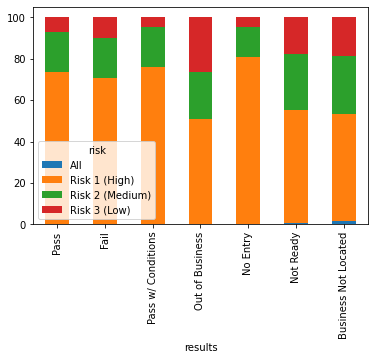

In [47]:
prop.plot(kind='bar',stacked=True)

## 4. ¿Cómo es el comportamiento de las inspecciones en el tiempo?

Se separa inspection_date en tres diferentes columnas: day, month, year y las agrega al dataframe:

In [130]:
fecha= df.inspection_date.str.split("/", n=2,expand=True)
df['day']=fecha[1]
df['month']=fecha[0]
df['year']=fecha[2]

In [131]:
df['inspection_date'] = pd.to_datetime(df['inspection_date'])

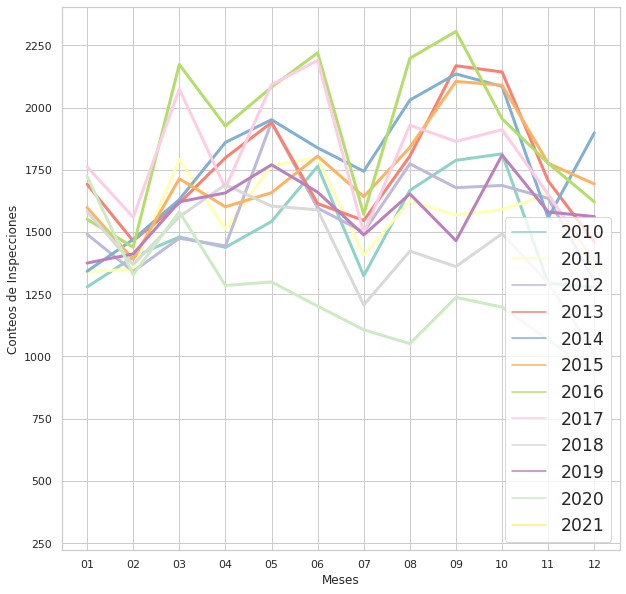

In [138]:
# Columnas de year, month y counts
fecha_separated = df.groupby(['year','month']).size().reset_index(name="conteos")
# Hacemos tabla donde las columnas son años y las filas mes 
fecha_separated_p = fecha_separated.pivot("month", "year","conteos")
# Graficamos 
sns.set(style='whitegrid',rc={'figure.figsize':(10,10)},palette='Set3')
h =sns.lineplot(data=fecha_separated_p,linewidth = 3,dashes=False)
plt.legend(fontsize='x-large', title_fontsize='40',loc='lower right')
h.set(xlabel='Meses',ylabel='Conteos de Inspecciones')
plt.show()

## 5. ¿Cómo es el comportamiento por tipo de resultados en el tiempo?

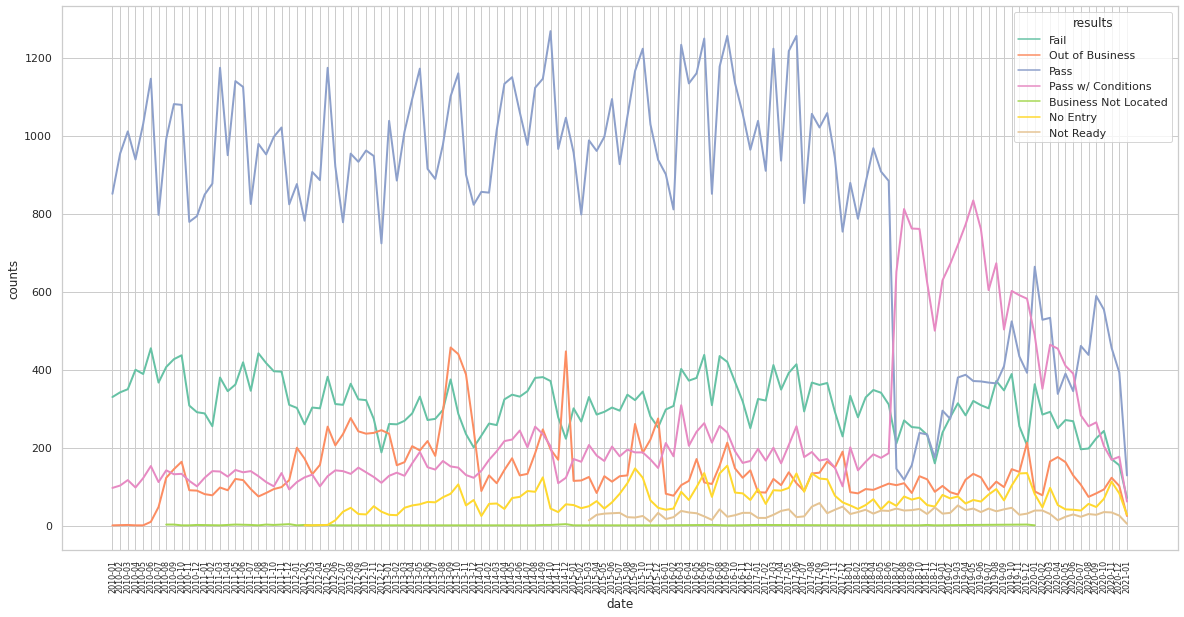

In [142]:
fecha_separated2 = df.groupby(['year','month','results']).size().reset_index(name="counts")
fecha_separated2['date']= fecha_separated2['year']+'-'+fecha_separated2['month']
g=fecha_separated2.drop(['year','month'],1)
g=g.set_index('date')
sns.set(style='whitegrid',rc={'figure.figsize':(20,10)},palette='Set2')
sns.lineplot(x='date',y='counts',hue='results',data=g,linewidth = 2)
plt.xticks(rotation= 90,size=8)
plt.show()

Se muestra el comportamiento anterior en porcentaje de inspecciones:

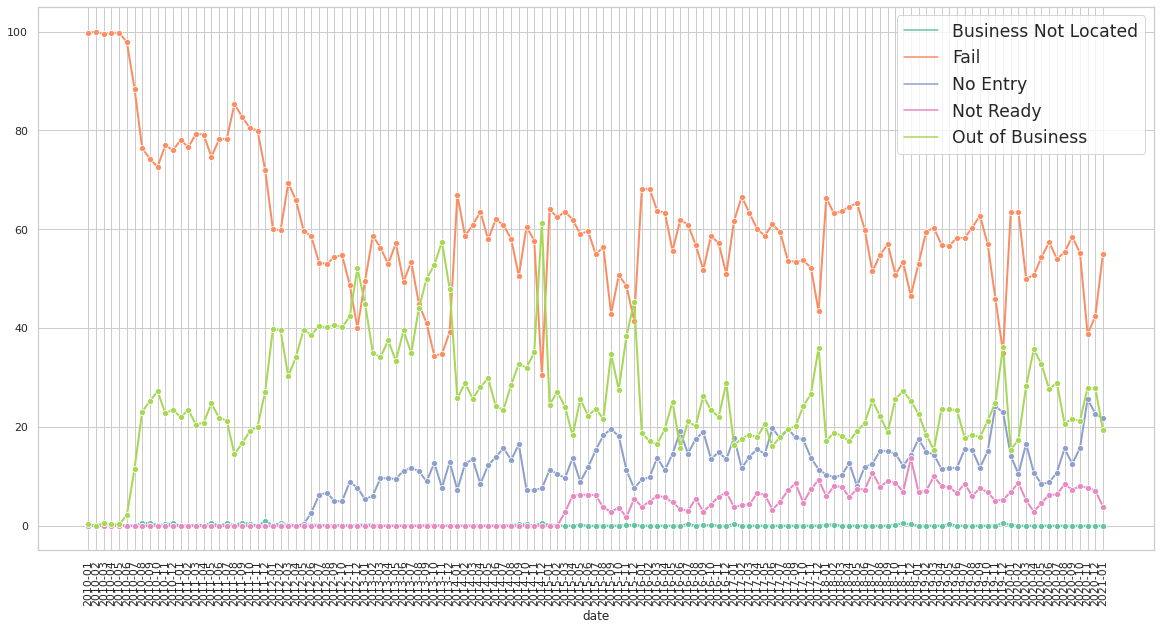

In [145]:
g2=fecha_separated2.drop(['year','month'],1)
g2=g2.pivot("date", "results","counts")
g2=g2.fillna(0)
g2['total']=g2.sum(1)
prop2=round(g2.iloc[:,0:5].apply(lambda x: x/x.sum()*100, axis=1),2)
sns.set(style='whitegrid',rc={'figure.figsize':(20,10)},palette='Set2')
h =sns.lineplot(data=prop2,linewidth = 2,dashes=False,marker='o')
plt.xticks(rotation= 90)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.show()

## 6. ¿Es importante la temporalidad de año, mes y día para las inspecciones?

Con variable inspection_date en formato tiempo creamos conteos del número de inspecciones hechas por día:

In [221]:
conteos_fechas = df.groupby(['inspection_date']).size().reset_index(name='conteos')
# hacemos que inspection_date sea el identificador de las filas
conteos_fechas = conteos_fechas.set_index('inspection_date')


In [222]:
# Separamos los días, meses, años
conteos_fechas.insert(1, 'year', conteos_fechas.index.year)
conteos_fechas.insert(2, 'month', conteos_fechas.index.month)
conteos_fechas.insert(3, 'day', conteos_fechas.index.day)
conteos_fechas = conteos_fechas.copy()

<AxesSubplot:title={'center':'2021'}, xlabel='Month'>

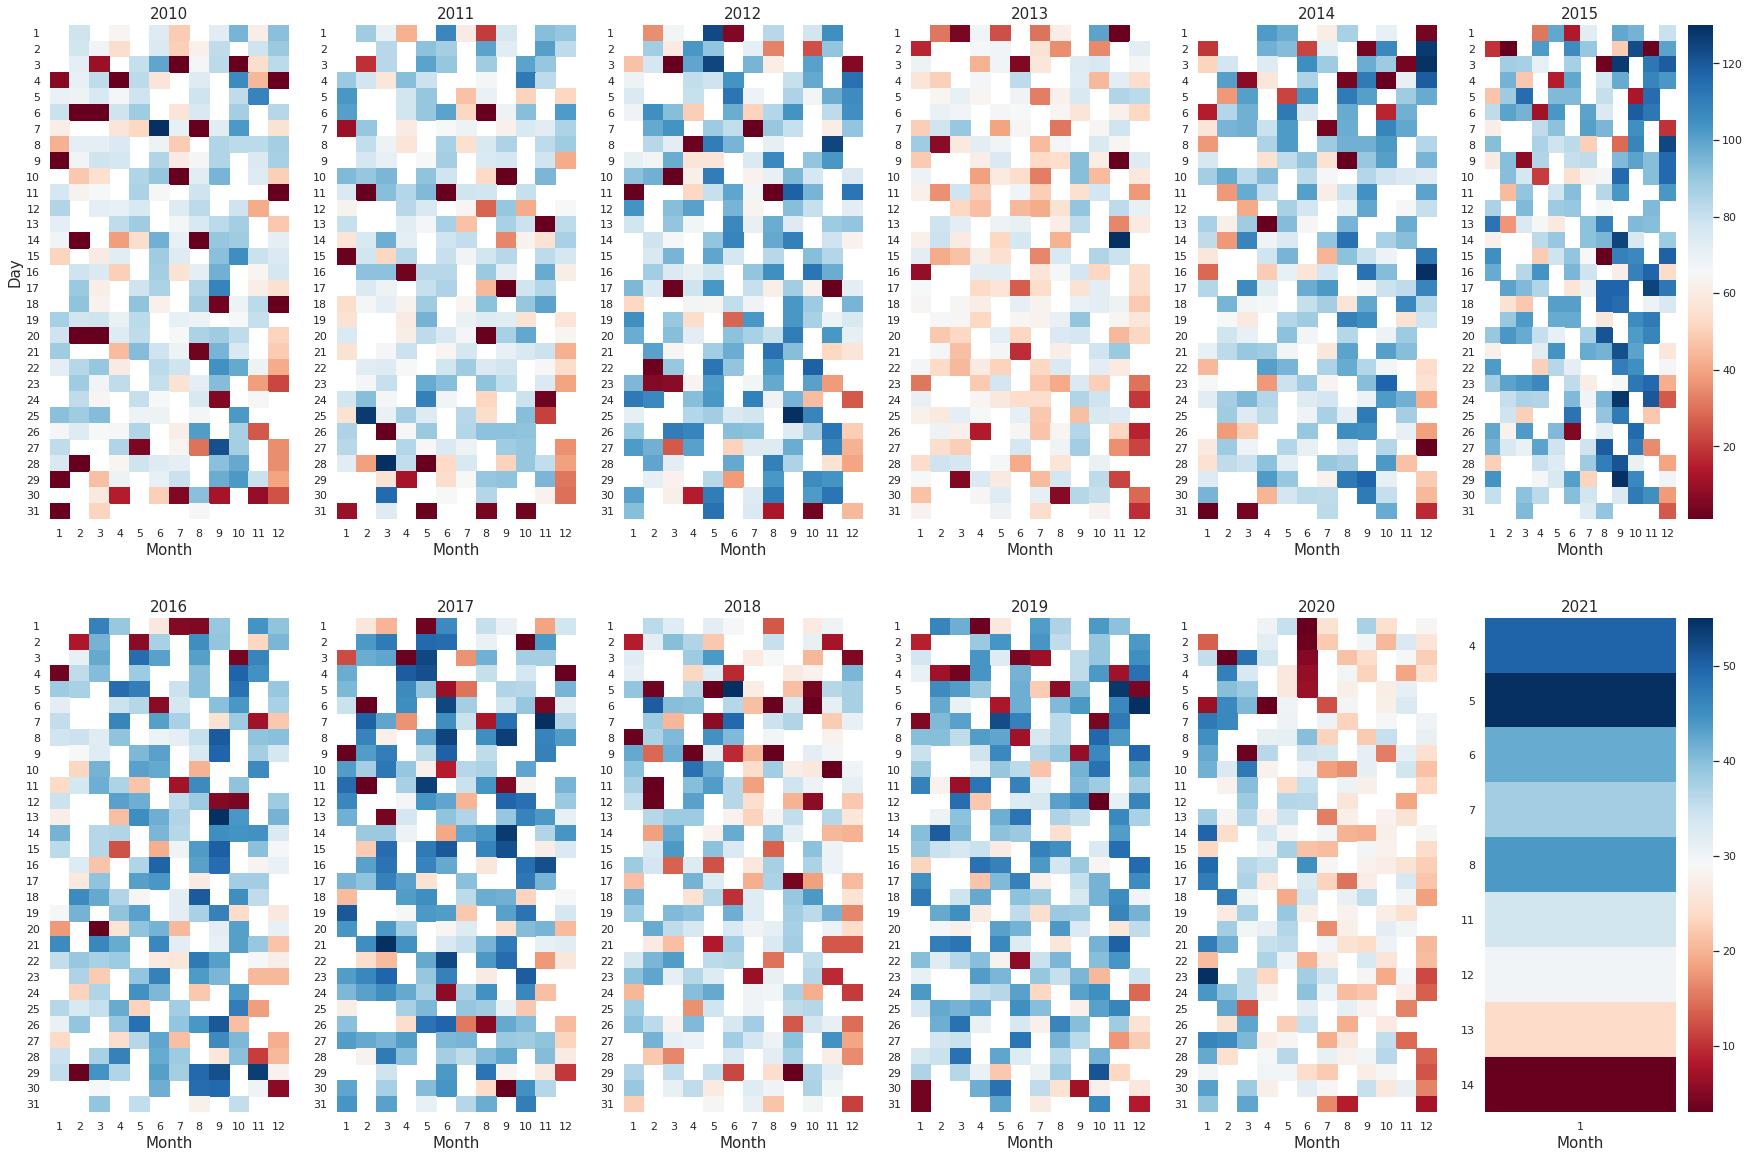

In [223]:
# Graficamos
fig, axs = plt.subplots(figsize=(30,20),ncols=6, nrows=2)
heatmaps(conteos_fechas,2010,axs[0][0],'no','Day')
heatmaps(conteos_fechas,2011,axs[0][1],'no','')
heatmaps(conteos_fechas,2012,axs[0][2],'no','')
heatmaps(conteos_fechas,2013,axs[0][3],'no','')
heatmaps(conteos_fechas,2014,axs[0][4],'no','')
heatmaps(conteos_fechas,2015,axs[0][5],'yes','')
heatmaps(conteos_fechas,2016,axs[1][0],'no','')
heatmaps(conteos_fechas,2017,axs[1][1],'no','')
heatmaps(conteos_fechas,2018,axs[1][2],'no','')
heatmaps(conteos_fechas,2019,axs[1][3],'no','')
heatmaps(conteos_fechas,2020,axs[1][4],'no','')
heatmaps(conteos_fechas,2021,axs[1][5],'yes','')

**Vemos si para si existe un patrón temporal en el universo de inspecciones que resultaron como reprobadas (Results="Fail"):**

In [228]:
fail=df[df.results=="Fail"]
len(fail)

41511

In [235]:
conteos_f = fail.groupby(['inspection_date']).size().reset_index(name='conteos')
conteos_f= conteos_f.set_index('inspection_date')
conteos_f.insert(1, 'year', conteos_f.index.year)
conteos_f.insert(2, 'month', conteos_f.index.month)
conteos_f.insert(3, 'day', conteos_f.index.day)
conteos_f = conteos_f.copy()

<AxesSubplot:title={'center':'2021'}, xlabel='Month'>

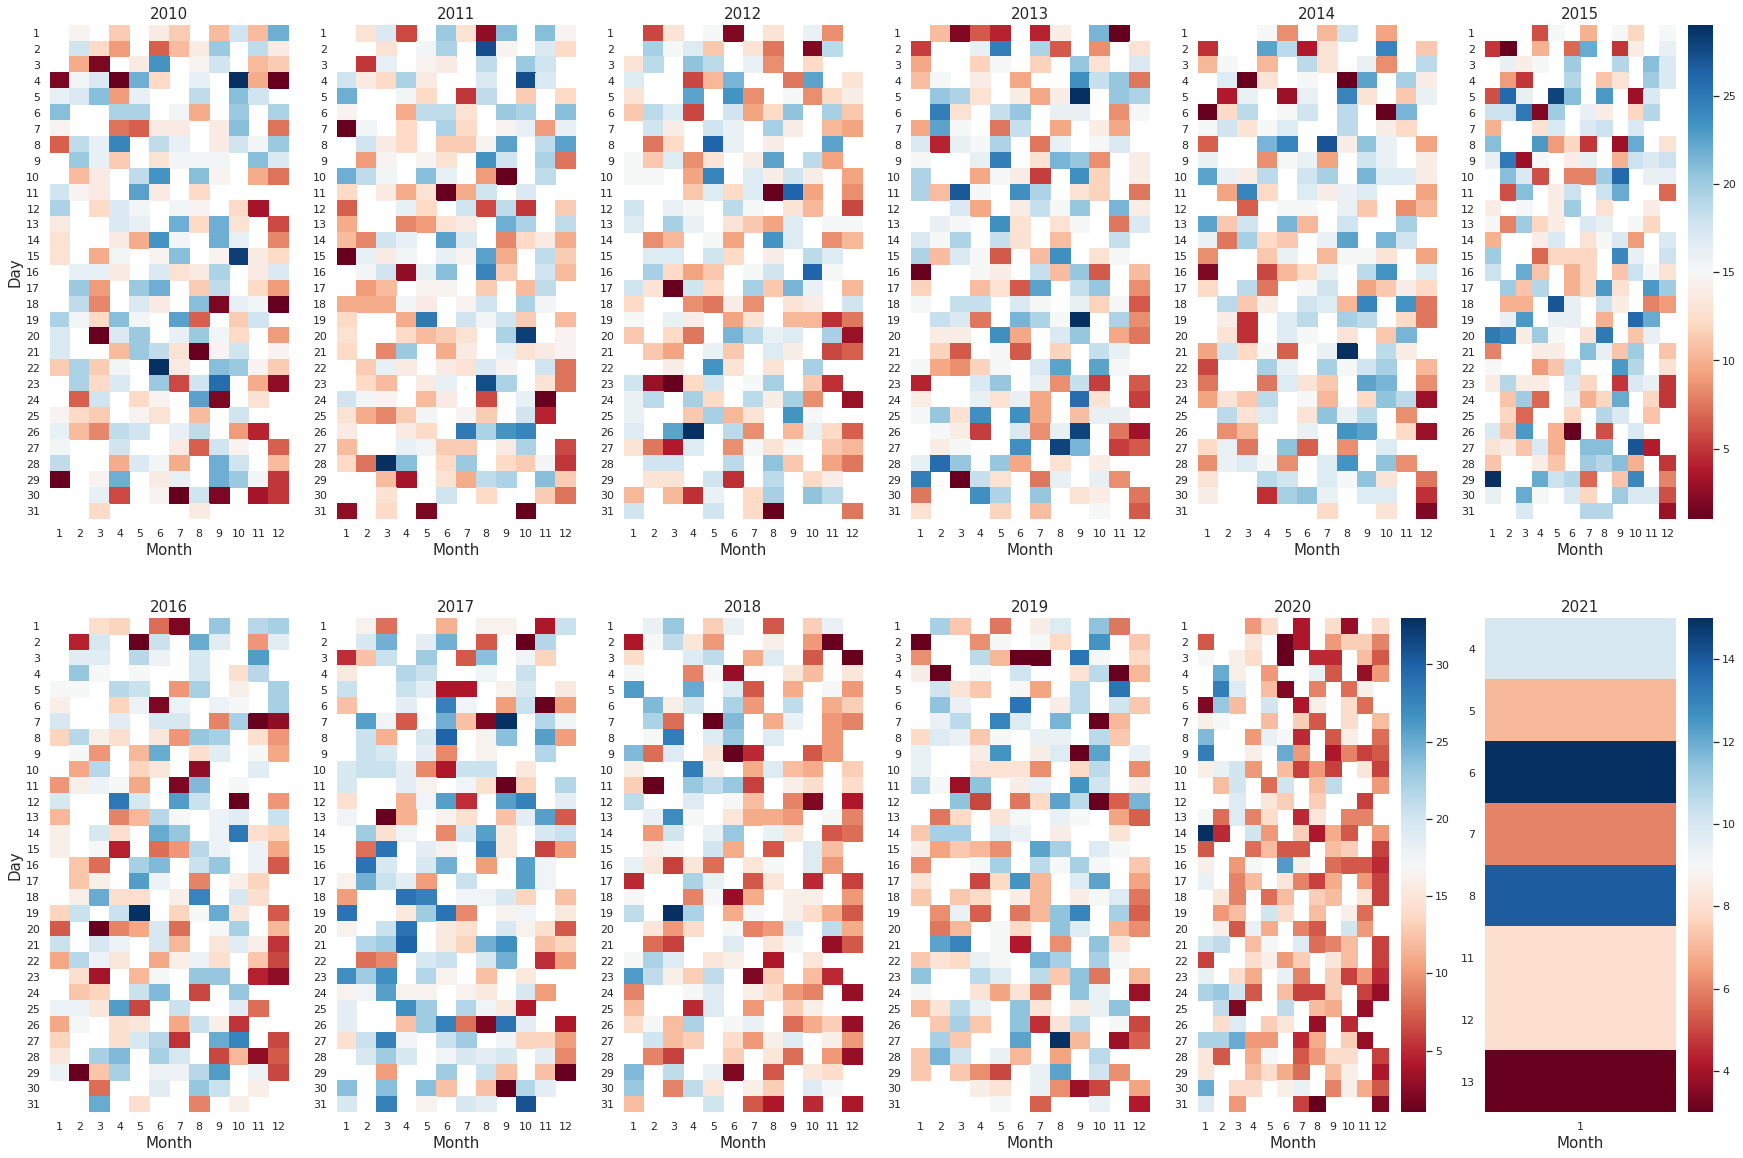

In [237]:
fig, axs = plt.subplots(figsize=(30,20),ncols=6, nrows=2)
heatmaps(conteos_f,2010,axs[0][0],'no','Day')
heatmaps(conteos_f,2011,axs[0][1],'no','')
heatmaps(conteos_f,2012,axs[0][2],'no','')
heatmaps(conteos_f,2013,axs[0][3],'no','')
heatmaps(conteos_f,2014,axs[0][4],'no','')
heatmaps(conteos_f,2015,axs[0][5],'yes','')
heatmaps(conteos_f,2016,axs[1][0],'no','Day')
heatmaps(conteos_f,2017,axs[1][1],'no','')
heatmaps(conteos_f,2018,axs[1][2],'no','')
heatmaps(conteos_f,2019,axs[1][3],'no','')
heatmaps(conteos_f,2020,axs[1][4],'yes','')
heatmaps(conteos_f,2021,axs[1][5],'yes','')

## 7. Mapa

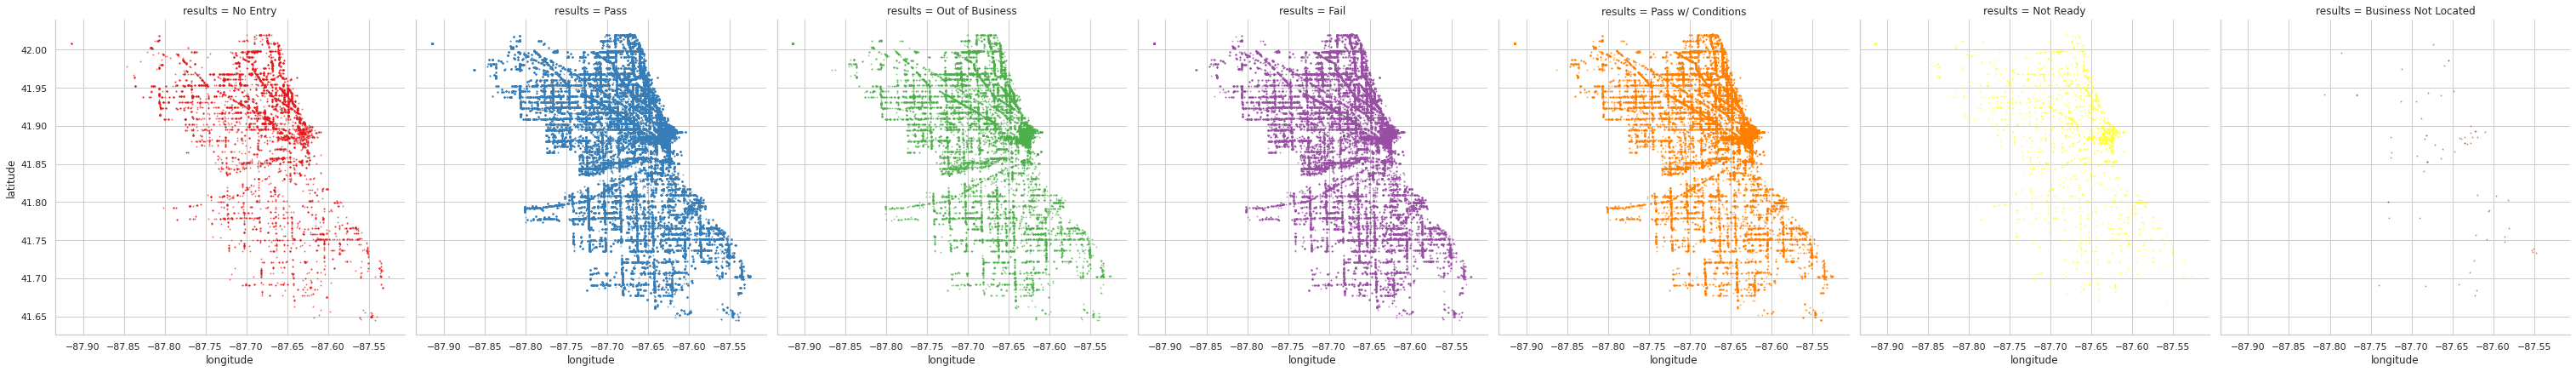

In [107]:
sns.set(style='whitegrid',rc={'figure.figsize':(20,10)},palette='Set1')
s = sns.lmplot(x='longitude',y='latitude',data=df,hue='results',col='results',fit_reg=False,height=6,
               scatter_kws={"s":1,"alpha":.5})

In [183]:
cols = ['Results','Latitude','Longitude']
rest = pd.read_csv('../data/Food_Inspections.csv', usecols=cols)

Eliminamos los registros sin coordenadas completas:

In [193]:
rest = rest.dropna(subset=['Latitude'])
rest = rest.dropna(subset=['Longitude'])

Filtramos únicamente aquellos registros que pasaron o no pasaron la prueba

In [194]:
passed = rest[rest['Results']=='Pass']
failed = rest[rest['Results']=='Fail']

In [195]:
len(passed), len(failed)

(112187, 41366)

Imagen de la ciudad de chicago:

In [188]:
chicago = plt.imread('../images/chicago.png')

In [189]:
boundires = ((rest.Longitude.min(),   rest.Longitude.max(),      
         rest.Latitude.min(), rest.Latitude.max()))

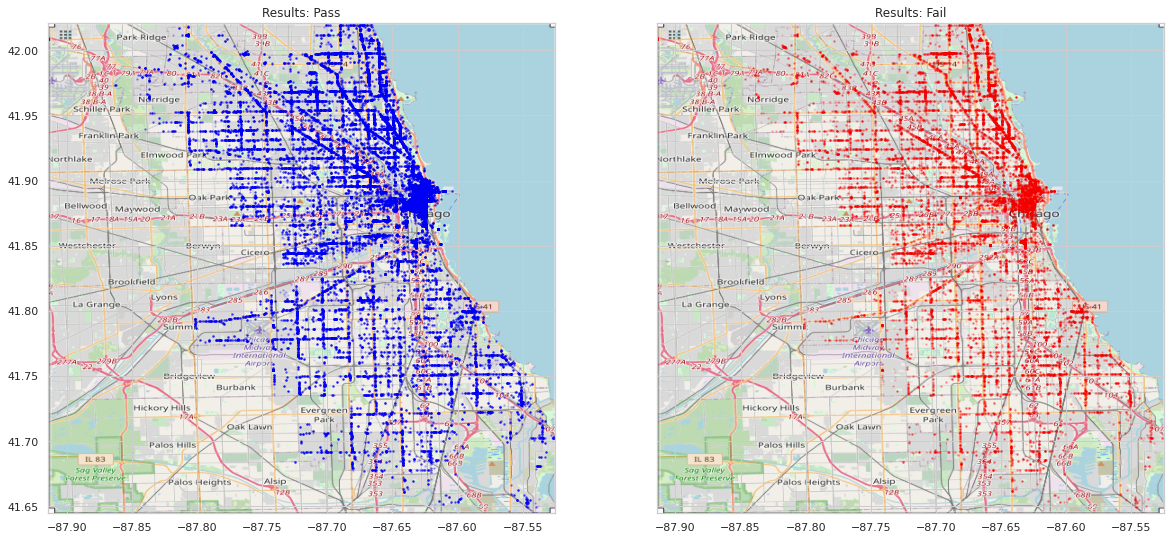

In [192]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize = (20,20))

ax[0].scatter(passed.Longitude, passed.Latitude, zorder=2, alpha=0.1, c='b', s=2)
ax[0].imshow(chicago, zorder=0, extent=boundires, aspect='equal')
ax[0].title.set_text('Results: Pass')

ax[1].scatter(failed.Longitude, failed.Latitude, zorder=2, alpha=0.1, c='r', s=2)
ax[1].imshow(chicago, zorder=0, extent=boundires, aspect='equal')
ax[1].title.set_text('Results: Fail')

plt.show()

---
---